In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import collections

In [45]:
def non_date_columns(df): # Takes the columns in which the columns are not a date,
    non_dates=[] # And when columns are dates.
    dates=[]
    counter=0
    for c in df.columns:
        try:
            pd.to_datetime(c,format='%Y-%m-%d %H:%M:%S')
            dates.append(c)
            counter=counter+1
        except:
            non_dates.append(c)
            counter=counter+1
    return(non_dates, dates)

def ignoring_status(not_polled_df, path_to_file):
    ignored_status= list(['dropout','Equipment to be collected','Not able to recruit','refusal at the moment of the installation'])
    # ignored_status=list([199,198,195])
    not_polled_df.loc[not_polled_df['curr_status_descr'].isin(ignored_status),'count']=False
    not_polled_df = not_polled_df[not_polled_df['count']!=False]
    current_date = datetime.strptime(path_to_file[-13:-5],'%Y%m%d')
    not_polled_df.loc[:,current_date]= not_polled_df['curr_status']
    del not_polled_df['count']
    return(not_polled_df)

In [46]:
path_to_file= '../01_inputs/doc_samples/KSA_RejectionReport_20220901_20230220.xlsx'

not_polled_df = pd.read_excel(path_to_file,sheet_name='Pnl_CombRep', index_col=1)
not_polled_numbers = pd.read_excel(path_to_file,sheet_name='Pnl_StatusRep', index_col=1)
not_polled_legend = pd.read_excel(path_to_file,sheet_name='Pnl_RejRep', index_col=1)

In [47]:
not_polled_df = ignoring_status(not_polled_df, path_to_file)
not_polled_numbers = ignoring_status(not_polled_numbers, path_to_file)
not_polled_legend = ignoring_status(not_polled_legend, path_to_file)

C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\3238588492.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_polled_df.loc[:,current_date]= not_polled_df['curr_status']
C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\3238588492.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_polled_df.loc[:,current_date]= not_polled_df['curr_status']
C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\3238588492.py:21: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [48]:
not_polled_legend

,Unnamed: 0,curr_status,curr_status_descr,consecutiveRejection,nonconsecutiveRejection,TotalRejects,TotalBehavioural,TotalTechnical,Accumulated_Last_n_days,2022-09-01 00:00:00,...,2023-02-11 00:00:00,2023-02-12 00:00:00,2023-02-13 00:00:00,2023-02-14 00:00:00,2023-02-15 00:00:00,2023-02-16 00:00:00,2023-02-17 00:00:00,2023-02-18 00:00:00,2023-02-19 00:00:00,2023-02-20 00:00:00
code_household,,,,,,,,,,,,,,,,,,,,,
163,3,130,to be polled and produced,0,0,0,0,0,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130
167,4,130,to be polled and produced,0,0,0,0,0,27,NW,...,aaa,aaa,aaa,aaa,aaa(V),aaa,aaa,aaa,aaa,130
168,5,130,to be polled and produced,0,0,1,0,1,66,aaa,...,aaa,aaa,aaa,aaa,aaa,aaa,aaa,aaa,aaa,130
21100004,6,130,to be polled and produced,0,1,6,6,0,15,aaa(V),...,aaa,aaa,aaa,aaa,aaa,aaa,aaa,aaa,aaa,130
21100217,9,155,force in,0,0,1,0,1,36,NW,...,NW,NW,NW,NW(V),aaa,aaa,aaa,aaa,aaa,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23244071,2930,130,to be polled and produced,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,aaa,aaa,aaa,aaa(V),aaa,130
23244092,2931,130,to be polled and produced,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,aaa,aaa(V),aaa,aaa,aaa,aaa,130
23244148,2932,130,to be polled and produced,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,aaa,aaa(V),aaa,aaa,aaa,aaa,130


In [49]:
ndates, dates =non_date_columns(not_polled_numbers)

{nan: 175,
 'aaa': 1772,
 'NW': 194,
 'NOT_POL': 103,
 'aaa(V)': 71,
 'NOT_POL(V)': 13,
 'RE': 1,
 'P%': 27,
 'RV': 22,
 'P%(V)': 2,
 'NW(V)': 1,
 'RV(V)': 1}

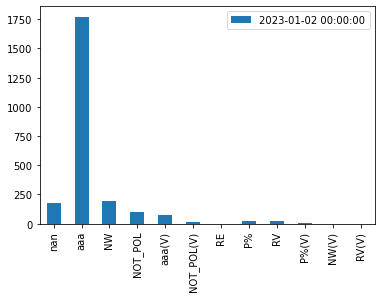

In [50]:
date_counter=50
counting_status = collections.Counter(not_polled_legend[dates[-date_counter]])
pd.DataFrame.from_dict(dict(counting_status), orient='index', columns=[dates[-date_counter]]).plot.bar()
dict(counting_status)

## Contando las visitas por cada household

In [183]:

def counting_strings(columns, df, str_to_search):
    df.fillna('str_nan', inplace=True)
    return(df[columns].apply(lambda col: col.str.contains(str_to_search, na=False), axis=1).sum(axis=1))
    

In [52]:
counting_strings(dates[:-1], not_polled_legend, '(V)')

C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\1867492273.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return(df[columns].apply(lambda col: col.str.contains(str_to_search, na=False), axis=1).sum(axis=1))


code_household
163          0
167          3
168          4
21100004     5
21100217    14
            ..
23244071     1
23244092     1
23244148     1
23244280     1
23244575     0
Length: 2382, dtype: int64

In [53]:
counting_strings(dates[:-1], not_polled_legend, 'NOT_POL')

code_household
163          1
167         14
168          4
21100004     4
21100217    62
            ..
23244071     0
23244092     0
23244148     0
23244280     0
23244575     0
Length: 2382, dtype: int64

## Contando valores consecutivos

In [54]:
def booling_strings(columns, df, str_to_search):
    df.fillna('str_nan', inplace=True)
    return(df[columns].apply(lambda col: col.str.contains(str_to_search, na=False), axis=1))

In [246]:
bool_not_pol = booling_strings(dates[:-1],not_polled_legend,'NOT_POL')
# (bool_not_pol!=bool_not_pol.shift())
bool_not_pol

C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\3772178912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('str_nan', inplace=True)


,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,...,2023-02-10,2023-02-11,2023-02-12,2023-02-13,2023-02-14,2023-02-15,2023-02-16,2023-02-17,2023-02-18,2023-02-19
code_household,,,,,,,,,,,,,,,,,,,,,
163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21100004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21100217,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23244071,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23244092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23244148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [247]:
bool_hh = bool_not_pol.T[[hh]]
bool_not_pol.iloc[120:121].T
bool_hh

code_household,21100217
2022-09-01,False
2022-09-02,False
2022-09-03,False
2022-09-04,False
2022-09-05,False
...,...
2023-02-15,False
2023-02-16,False
2023-02-17,False
2023-02-18,False


In [302]:
hh= 21100217
# bool_hh = bool_not_pol.iloc[120:121].T
bool_hh = bool_not_pol.T[[hh]]
bool_hh['counter']=~bool_hh[hh]
# bool_hh['counter']= bool_hh.cumsum()
bool_hh

code_household,21100217,counter
2022-09-01,False,True
2022-09-02,False,True
2022-09-03,False,True
2022-09-04,False,True
2022-09-05,False,True
...,...,...
2023-02-15,False,True
2023-02-16,False,True
2023-02-17,False,True
2023-02-18,False,True


In [416]:
def consecutive_not_pol_days(not_polled_legend, dates):
    bool_not_pol = booling_strings(dates[:-1],not_polled_legend,'NOT_POL')
    bool_df = ~bool_not_pol
    # ~bool_df.cumsum(axis=0)
    group_df = bool_df.cumsum(axis=1)
    df_list =[]
    for i in range (0,group_df.shape[0],1):
        occurences = pd.DataFrame.from_dict(dict(collections.Counter(group_df.iloc[i])),orient='index')-1
        occurences = occurences[occurences[0]!=0]
        occurences[occurences[0]>2]=3
        consecutives_2 = occurences[0].sort_values()
        consecutives_2
        dictionary = dict(collections.Counter(consecutives_2))
        dictionary.update({'code_household':group_df.index[i]})
        # df_list.append(dictionary)
        df_list.append(pd.DataFrame.from_dict(dictionary,orient='index').T.add_prefix('S'))#.set_index(group_df.index[0])
    return(pd.concat(df_list).set_index('Scode_household'))

In [417]:
consecutive_not_pol_days(not_polled_legend, dates)

C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\3772178912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('str_nan', inplace=True)


,S1,S2,S3
Scode_household,,,
163,1.0,NaN,NaN
167,2.0,1.0,1.0
168,NaN,NaN,1.0
21100004,NaN,NaN,1.0
21100217,2.0,NaN,9.0
...,...,...,...
23244071,NaN,NaN,NaN
23244092,NaN,NaN,NaN
23244148,NaN,NaN,NaN


In [324]:
occurences = occurences[occurences[0]!=0]
occurences[occurences[0]>2]=3
occurences

,0
5,3
6,3
18,3
20,3
21,3
23,3
43,3
55,3
76,3
88,1


# Separando en semanas

In [432]:
not_polled_legend = not_polled_legend[dates]

In [73]:
def weekgrouper(df,column):
    weeks = [g for n, g in df.groupby(pd.Grouper(key=column,freq='W'))]
    return(weeks)

In [426]:
weeks = weekgrouper(not_polled_legend.T.reset_index(),'index' )
prueba = weeks[5]
prueba = prueba.set_index(['index'])
prueba_visits = pd.DataFrame(counting_strings(prueba.T.columns, prueba.T, '(V)'), columns=['V'])

C:\Users\alguadar2201\AppData\Local\Temp\1\ipykernel_22784\1867492273.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return(df[columns].apply(lambda col: col.str.contains(str_to_search, na=False), axis=1).sum(axis=1))


In [428]:
non_dates, dates = non_date_columns(prueba.T)
eses = consecutive_not_pol_days(prueba.T, dates)

In [431]:
pd.concat([prueba_visits,eses], axis=1)

,V,S2,S3,S1
163,0,NaN,NaN,NaN
167,0,NaN,NaN,NaN
168,0,NaN,NaN,NaN
21100004,0,NaN,NaN,NaN
21100217,1,1.0,NaN,NaN
...,...,...,...,...
23244071,0,NaN,NaN,NaN
23244092,0,NaN,NaN,NaN
23244148,0,NaN,NaN,NaN
23244280,0,NaN,NaN,NaN
